In [1]:
import cv2
import numpy as np
import time
from PIL import Image
from PIL.ExifTags import TAGS

In [17]:
net = cv2.dnn.readNet("yolov3.weights","yolov3.cfg")
classes = []
with open("coco.names","r") as f:
    classes = [line.strip() for line in f.readlines()]

layer_names = net.getLayerNames()
outputlayers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

#cap=cv2.VideoCapture(0)
#frame_id = 0
#_,frame= cap.read()  
#frame_id+=1
frame=cv2.imread("crowd.webp")
new=frame.copy()
height,width,channels = frame.shape
blob = cv2.dnn.blobFromImage(frame,0.00392,(320,320),(0,0,0),True,crop=False)       
net.setInput(blob)
outs = net.forward(outputlayers)
class_ids=[]
confidences=[]
boxes=[]
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x= int(detection[0]*width)
            center_y= int(detection[1]*height)
            w = int(detection[2]*width)
            h = int(detection[3]*height)
            x=int(center_x - w/2)
            y=int(center_y - h/2)
            if str(classes[class_id]) == "person":
                boxes.append([x,y,w,h]) 
                confidences.append(float(confidence))
                class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes,confidences,0.4,0.6)
for i in boxes:
    cv2.rectangle(new,(i[0],i[1]),(i[0]+i[-2],i[1]+i[-1]),(255,255,0),2)

In [18]:
import matplotlib.pyplot as plt

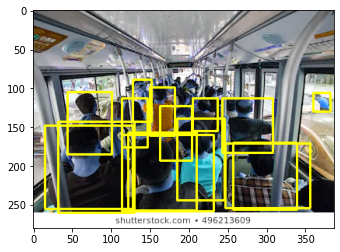

In [19]:
plt.imshow(new)

In [29]:
centers=list(map(lambda x:[x[0],x[1][0]+x[1][2]/2,x[1][1]+x[1][3]/2],enumerate(boxes)))

In [33]:
centers=sorted(centers,key=lambda x:x[1])

In [35]:
import itertools as it

In [38]:
temp1=list(it.combinations(centers,2))

In [39]:
temp1

[([0, 71.5, 201.5], [6, 72.5, 145.0]),
 ([0, 71.5, 201.5], [11, 81.0, 201.5]),
 ([0, 71.5, 201.5], [7, 130.5, 144.5]),
 ([0, 71.5, 201.5], [3, 140.0, 116.0]),
 ([0, 71.5, 201.5], [4, 166.0, 130.0]),
 ([0, 71.5, 201.5], [12, 166.0, 207.0]),
 ([0, 71.5, 201.5], [1, 173.0, 209.0]),
 ([0, 71.5, 201.5], [9, 183.5, 158.0]),
 ([0, 71.5, 201.5], [10, 215.5, 191.5]),
 ([0, 71.5, 201.5], [5, 221.0, 134.0]),
 ([0, 71.5, 201.5], [8, 275.5, 148.0]),
 ([0, 71.5, 201.5], [13, 298.0, 213.0]),
 ([0, 71.5, 201.5], [2, 301.5, 212.5]),
 ([0, 71.5, 201.5], [14, 371.0, 118.0]),
 ([6, 72.5, 145.0], [11, 81.0, 201.5]),
 ([6, 72.5, 145.0], [7, 130.5, 144.5]),
 ([6, 72.5, 145.0], [3, 140.0, 116.0]),
 ([6, 72.5, 145.0], [4, 166.0, 130.0]),
 ([6, 72.5, 145.0], [12, 166.0, 207.0]),
 ([6, 72.5, 145.0], [1, 173.0, 209.0]),
 ([6, 72.5, 145.0], [9, 183.5, 158.0]),
 ([6, 72.5, 145.0], [10, 215.5, 191.5]),
 ([6, 72.5, 145.0], [5, 221.0, 134.0]),
 ([6, 72.5, 145.0], [8, 275.5, 148.0]),
 ([6, 72.5, 145.0], [13, 298.0, 213

In [41]:
temp2=list(map(lambda x:[x[0][0],x[1][0],
                   ((abs(x[1][1]-x[0][1])**2+(abs(x[1][2]-x[0][2])**2))**0.5)
                  ],temp1))
temp2=list(filter(lambda x:x[-1]<150,temp2))

In [42]:
temp2

[[0, 6, 56.50884886458049],
 [0, 11, 9.5],
 [0, 7, 82.03657720797473],
 [0, 3, 109.5559217933928],
 [0, 4, 118.50105484762572],
 [0, 12, 94.65991759979511],
 [0, 1, 101.77671639427163],
 [0, 9, 120.1509467295202],
 [0, 10, 144.34680460612904],
 [6, 11, 57.13580313603722],
 [6, 7, 58.00215513237418],
 [6, 3, 73.46597852067309],
 [6, 4, 94.69556483806409],
 [6, 12, 112.18845751680517],
 [6, 1, 119.14801718870524],
 [6, 9, 111.75866856758807],
 [6, 5, 148.9068500774897],
 [11, 7, 75.49337719296972],
 [11, 3, 103.88094146666172],
 [11, 4, 111.07317407907276],
 [11, 12, 85.17775531205316],
 [11, 1, 92.30520028687441],
 [11, 9, 111.34855185407666],
 [11, 10, 134.87123488720638],
 [7, 3, 30.041637771599603],
 [7, 4, 38.34709897762802],
 [7, 12, 71.87836948623696],
 [7, 1, 77.24312267121262],
 [7, 9, 54.69232121605372],
 [7, 10, 97.12878049270464],
 [7, 5, 91.10707985661708],
 [7, 8, 145.04223522822585],
 [3, 4, 29.5296461204668],
 [3, 12, 94.64142856064674],
 [3, 1, 98.68130522039117],
 [3, 9

In [45]:
prec=100-len(temp2)/len(temp1)*100

In [46]:
prec

27.61904761904762

In [47]:
people_count=len(boxes)

In [48]:
people_count

15